<a href="https://colab.research.google.com/github/pawanraje16/CVDLlab/blob/main/mango_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


2025-06-04 18:20:56.954468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749061257.141316      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749061257.196421      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the model without the top (fully connected) layers
base_model =  ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1749061294.029338      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
base_model.trainable = False

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(6, activation='softmax')(x)  # 6-class classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 49,279,622 (187.99 MB)

 Trainable params: 25,691,910 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
print(f"Total layers in Resnet50: {len(model.layers)}")

Total layers in Resnet50: 179


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator (for rescaling)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/train',   # Path to train folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)

Found 42000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.


In [9]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749061458.185212      94 service.cc:148] XLA service 0x7dea28002e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749061458.186152      94 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749061459.662969      94 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1313 ━━━━━━━━━━━━━━━━━━━━ 1:08 52ms/step - accuracy: 0.1250 - loss: 21.4067 

I0000 00:00:1749061464.056567      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 570s 422ms/step - accuracy: 0.8968 - loss: 1.8875 - val_accuracy: 0.9929 - val_loss: 0.0397
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 193s 147ms/step - accuracy: 0.9571 - loss: 0.1570 - val_accuracy: 0.9933 - val_loss: 0.0449
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 188s 143ms/step - accuracy: 0.9593 - loss: 0.1615 - val_accuracy: 0.9947 - val_loss: 0.0246
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 190s 144ms/step - accuracy: 0.9718 - loss: 0.1343 - val_accuracy: 0.9942 - val_loss: 0.0392
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 187s 142ms/step - accuracy: 0.9728 - loss: 0.1271 - val_accuracy: 0.9971 - val_loss: 0.0141
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 189s 144ms/step - accuracy: 0.9771 - loss: 0.1059 - val_accuracy: 0.9960 - val_loss: 0.0190
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 201s 153ms/step - accuracy: 0.9809 - loss: 0.0947 - val_accuracy: 0.9974 - val_loss: 0.0115
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 190s 145ms/step - accuracy: 0.9

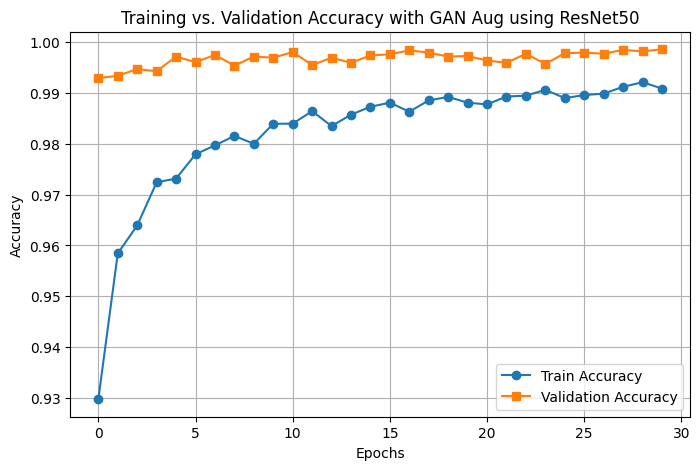

In [10]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy with GAN Aug using ResNet50')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

282/282 ━━━━━━━━━━━━━━━━━━━━ 118s 420ms/step - accuracy: 0.9982 - loss: 0.0507
Test accuracy: 0.9959


282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step

Classification Report with GAN Aug using ResNet50:
                    precision    recall  f1-score   support

       ANTHRECNOSE       1.00      1.00      1.00      1500
           DIEBACK       1.00      1.00      1.00      1500
  GALLMILDGEDAMAGE       0.99      1.00      1.00      1500
           HEALTHY       0.99      1.00      1.00      1500
INSECTDAMAGEWEBBER       0.99      0.99      0.99      1500
        LEAFBLIGHT       1.00      0.99      0.99      1500

          accuracy                           1.00      9000
         macro avg       1.00      1.00      1.00      9000
      weighted avg       1.00      1.00      1.00      9000



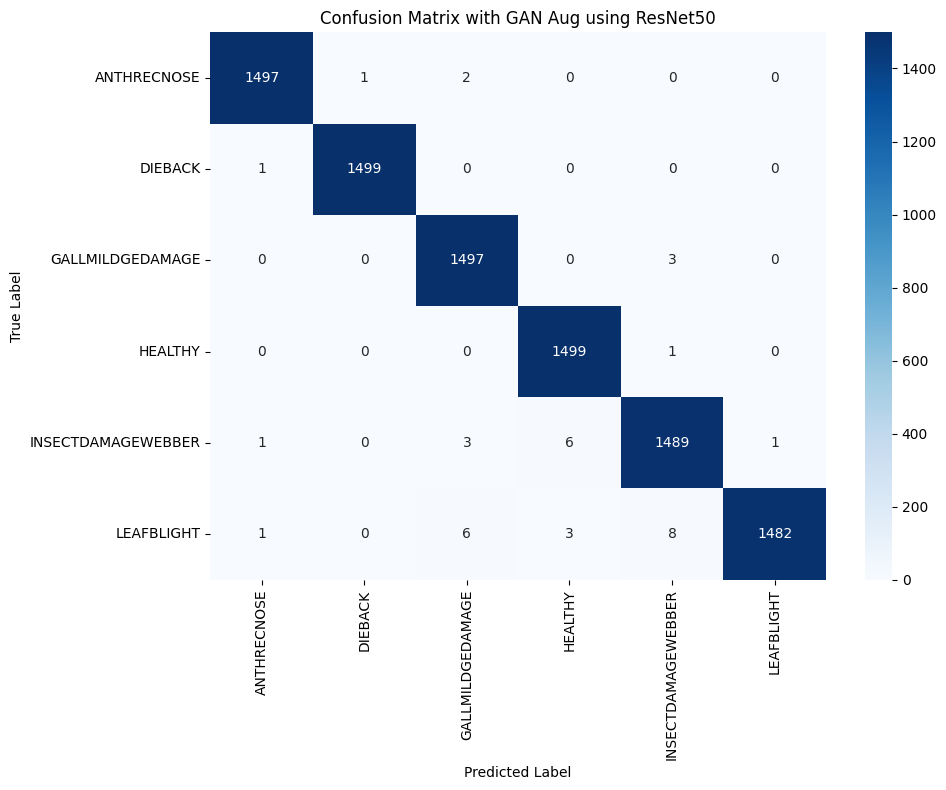

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Predict on test data
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report with GAN Aug using ResNet50:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix with GAN Aug using ResNet50")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()